<a href="https://colab.research.google.com/github/sinu7000/Machine-Learning/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas scikit-learn matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/train.csv')

# Display the first few rows of the dataset
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
# Select relevant columns
selected_data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Check for missing values
print(selected_data.isnull().sum())

# Drop rows with missing values, if any
selected_data = selected_data.dropna()

# Display first few rows
print(selected_data.head())


GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64
   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000


In [5]:
# Input features
X = selected_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Target variable
y = selected_data['SalePrice']


In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (1168, 3)
Test data shape: (292, 3)


In [7]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461


In [9]:
# Make predictions using the test set
y_pred = model.predict(X_test)


In [10]:
# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371


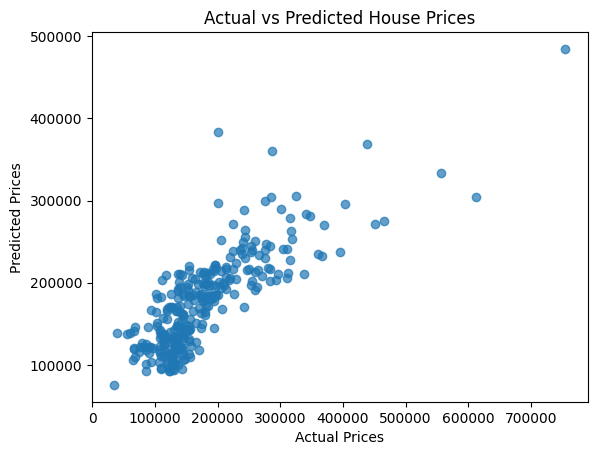

In [11]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


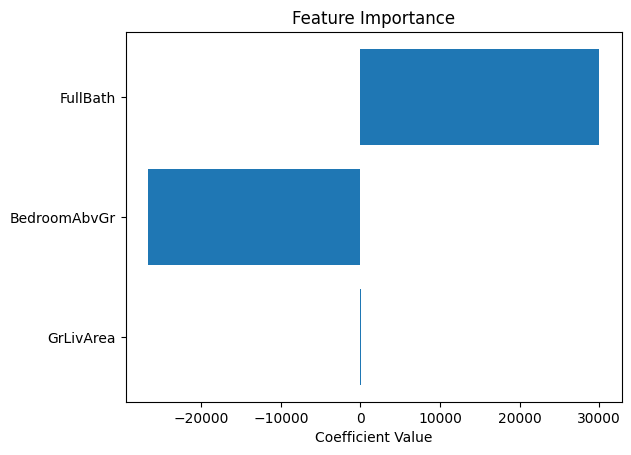

In [12]:
# Feature importance (coefficients)
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
coef = model.coef_

plt.barh(features, coef)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled features
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
